## Simple Introudction :
 
 * This Dataset from kaggel .
 * this Dataset contain on Animia (Target) and some factors that affecting on it 
 * This problem consider as binary classificaton , we should classify if the person have Animai or not (1,0)
 * Part1 : 
   *  contain Some Analysis on the Data , DataExplantory additional to preparing and cleaning the data
 * part2 : Contain
     * i will use some traditional machine learning Techiqes such RandomForestClassificaion,NaivaBase,LogisticRegression,DescisonTree,Support Vector Machine 
     * i will use some Neural Networks Techniqes by using Tensorflo. 


## About the Dataset :

Dataset Description:
This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

## Columns:
* Number:

   * Type: Integer

   * Description:A unique identifier for each individual case.

* Sex:
   * Type: Categorical (Male, Female)

   * Description: The sex of the individual.

* %Red Pixel:
   * Type: Float

   * Description: The percentage of red pixels in the image associated with the case.

* %Green Pixel:
   * Type: Float

   * Description: The percentage of green pixels in the image associated with the case.

* %Blue Pixel:
   * Type: Float

   * Description: The percentage of blue pixels in the image associated with the case.

* Hb:
   * Type: Float

   * Description: Hemoglobin level of the individual, measured in grams per deciliter (g/dL).

* Anaemic:
   * Type:Catagorical (Yes | No )
   * Description: An indicator of anaemia status (1 for anaemic, 0 for not anaemic).


## --->>> * if you founf my Notebook usefull upvote me * <<---- 

In [1]:
# imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Part1 : Analysis ,Visualization and preparing the dataset

In [2]:
# loading the dataset:

data=pd.read_csv("output.csv")
data.head(25)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,29.1660,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


In [3]:
# get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB
None
-------------------------
shape of the dataset -->> (104, 7)


In [4]:
# Make some Statisticals on the dataset :

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,104.0,52.500000,30.166206,1.0000,26.750000,52.50000,78.250000,104.0000
%Red Pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
%Green pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
%Blue pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
Hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


In [5]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Sex', 'Anaemic'], dtype='object')
 Numerical_columns ----->>> Index(['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], dtype='object') 
 Discrete_columns ---->>> Index(['Number'], dtype='object') 
 Continous_cols ----->> Index(['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], dtype='object') 
 Nominal Columns --->> Anaemic    2
dtype: int64


In [6]:
# discovel all Types of data:
data.dtypes

Number            int64
Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [7]:
#check if there null values in data:
# NO Found any null values :
data.isna().mean()

Number          0.0
Sex             0.0
%Red Pixel      0.0
%Green pixel    0.0
%Blue pixel     0.0
Hb              0.0
Anaemic         0.0
dtype: float64

In [8]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in Number -->> 
 Number
1      1
2      1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: count, Length: 104, dtype: int64
-------------------------
counts of items in Sex -->> 
 Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64
-------------------------
counts of items in %Red Pixel -->> 
 %Red Pixel
44.1609    2
43.2555    1
45.4201    1
49.5899    1
53.9113    1
          ..
48.6358    1
44.2572    1
42.2473    1
47.8913    1
43.5706    1
Name: count, Length: 103, dtype: int64
-------------------------
counts of items in %Green pixel -->> 
 %Green pixel
29.5993    2
30.8421    1
29.4684    1
28.9754    1
26.3455    1
          ..
26.6982    1
29.6578    1
30.2089    1
27.0952    1
29.8094    1
Name: count, Length: 103, dtype: int64
-------------------------
counts of items in %Blue pixel -->> 
 %Blue pixel
26.2399    2
25.9025    1
25.1115    1
21.4347    1
19.7433    1
          ..
24.6660    1
26.0850    1
27.5

In [9]:
# i will drop Number column from dataset As it unless :
#Cleaning the dataset:
data=data.drop(columns="Number",axis=1)
data

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [10]:
# clean the columns of the dataset from precentage sign % :
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

,Sex,RedPixel,Greenpixel,Bluepixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [11]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>Sex column  :  
['M' 'F' 'F ' 'M ']
**************************************************
All items in the ---->>>RedPixel column  :  
[43.2555 45.6033 45.0107 44.5398 43.287  45.0994 43.1457 43.6103 45.0423
 46.5143 45.3506 44.4062 44.9642 45.0484 46.9942 45.5842 42.5358 44.0957
 45.7104 40.9365 44.9116 43.4225 43.3019 47.6372 45.6906 43.4098 44.4252
 44.3297 47.8913 42.2473 44.2572 48.6358 42.1652 45.4434 42.1528 45.2588
 46.4081 47.2275 47.3642 46.1449 41.7122 47.9777 46.7628 44.9526 44.1868
 46.9428 48.8523 45.7581 48.5356 45.5833 45.9659 44.0418 43.9633 47.1003
 46.0477 46.2133 49.1475 45.7986 40.6395 50.3562 43.9224 45.0693 45.8483
 43.4837 38.7968 45.4201 44.1609 42.5892 46.9597 44.1995 41.133  52.9108
 50.4976 44.72   53.9113 49.5899 45.9707 42.4532 44.3346 43.8783 42.8269
 43.1335 45.4735 50.4801 46.255  46.7979 46.5811 54.6478 48.8763 46.3745
 43.1425 49.5037 47.7549 42.5314 52.154  51.5802 48.3681 47.326  49.9999
 42.2324 45.6064 45.2095 43.5706]
*******

## processing on the dataset : 

In [12]:
# Convert all Categorical columns into Numerical columns :
# All data Become Numerical : 

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

,Sex,RedPixel,Greenpixel,Bluepixel,Hb,Anaemic
0,2,17,91,50,2,1
1,0,56,33,58,44,0
2,1,43,52,54,27,0
3,0,38,55,64,44,0
4,3,18,89,53,33,0
...,...,...,...,...,...,...
99,1,94,62,6,50,1
100,3,7,88,88,2,1
101,0,57,99,10,36,0
102,3,48,61,41,43,0


In [13]:
# Standardize the data

features=["Sex","Hb","Anaemic","Bluepixel","Greenpixel","RedPixel"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[features]) 
x_scaled

array([[ 0.38728003, -1.84966031,  1.73205081, -0.03670505,  1.34364567,
        -1.13952745],
       [-1.36389925,  0.66882979, -0.57735027,  0.23354805, -0.61310727,
         0.17538673],
       [-0.48830961, -0.35055906, -0.57735027,  0.0984215 ,  0.027898  ,
        -0.262918  ],
       [-1.36389925,  0.66882979, -0.57735027,  0.43623787,  0.12910936,
        -0.43149674],
       [ 1.26286967,  0.00922524, -0.57735027,  0.06463986,  1.27617143,
        -1.1058117 ],
       [ 0.38728003,  1.62825459, -0.57735027,  1.11187061, -0.81552999,
        -0.128055  ],
       [-1.36389925, -1.54984006,  1.73205081,  0.80783588,  1.00627447,
        -1.17324319],
       [-0.48830961, -1.01016361, -0.57735027,  1.38212371,  0.1965836 ,
        -0.90351721],
       [-1.36389925,  0.36900954, -0.57735027, -0.1718316 ,  0.26405784,
        -0.22920225],
       [-1.36389925, -1.19005576,  1.73205081,  0.13220314, -1.05168983,
         0.68112295],
       [-1.36389925,  0.12915334, -0.57735027, -0.

In [14]:
# Handle the outliers on the ALL features:
#calc Q1,Q2,Q3,IQR and detect the outliers:
#calc the lower & upper limits :

features=["Sex","RedPixel","Greenpixel","Bluepixel","Hb","Anaemic"]

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr 
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]: 
         if ((x> upper_limit) or (x<low_limit)): 
             outlier.append(x)           
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")
       
    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Sex feature
Q1 of Sex --->>> 0.75 
 Q3 of Sex ---->>> 3.0 
 iqr--->>2.25
 low_limit--->>>-2.625 
  upper_limit--->>> 6.375 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in RedPixel feature
Q1 of RedPixel --->>> 25.75 
 Q3 of RedPixel ---->>> 76.25 
 iqr--->>50.5
 low_limit--->>>-50.0 
  upper_limit--->>> 152.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in Greenpixel feature
Q1 of Greenpixel --->>> 25.75 
 Q3 of Greenpixel ---->>> 76.25 
 iqr--->>50.5
 low_limit--->>>-50.0 
  upper_limit--->>> 152.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in Bluepixel feature
Q1 of Bluepixel --->>> 25.75 
 Q3 of Bluepixel ---->>> 76.25 
 iqr--->>50.5
 low_limit--->>>-50.0 
  upper_limit--->>> 152.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


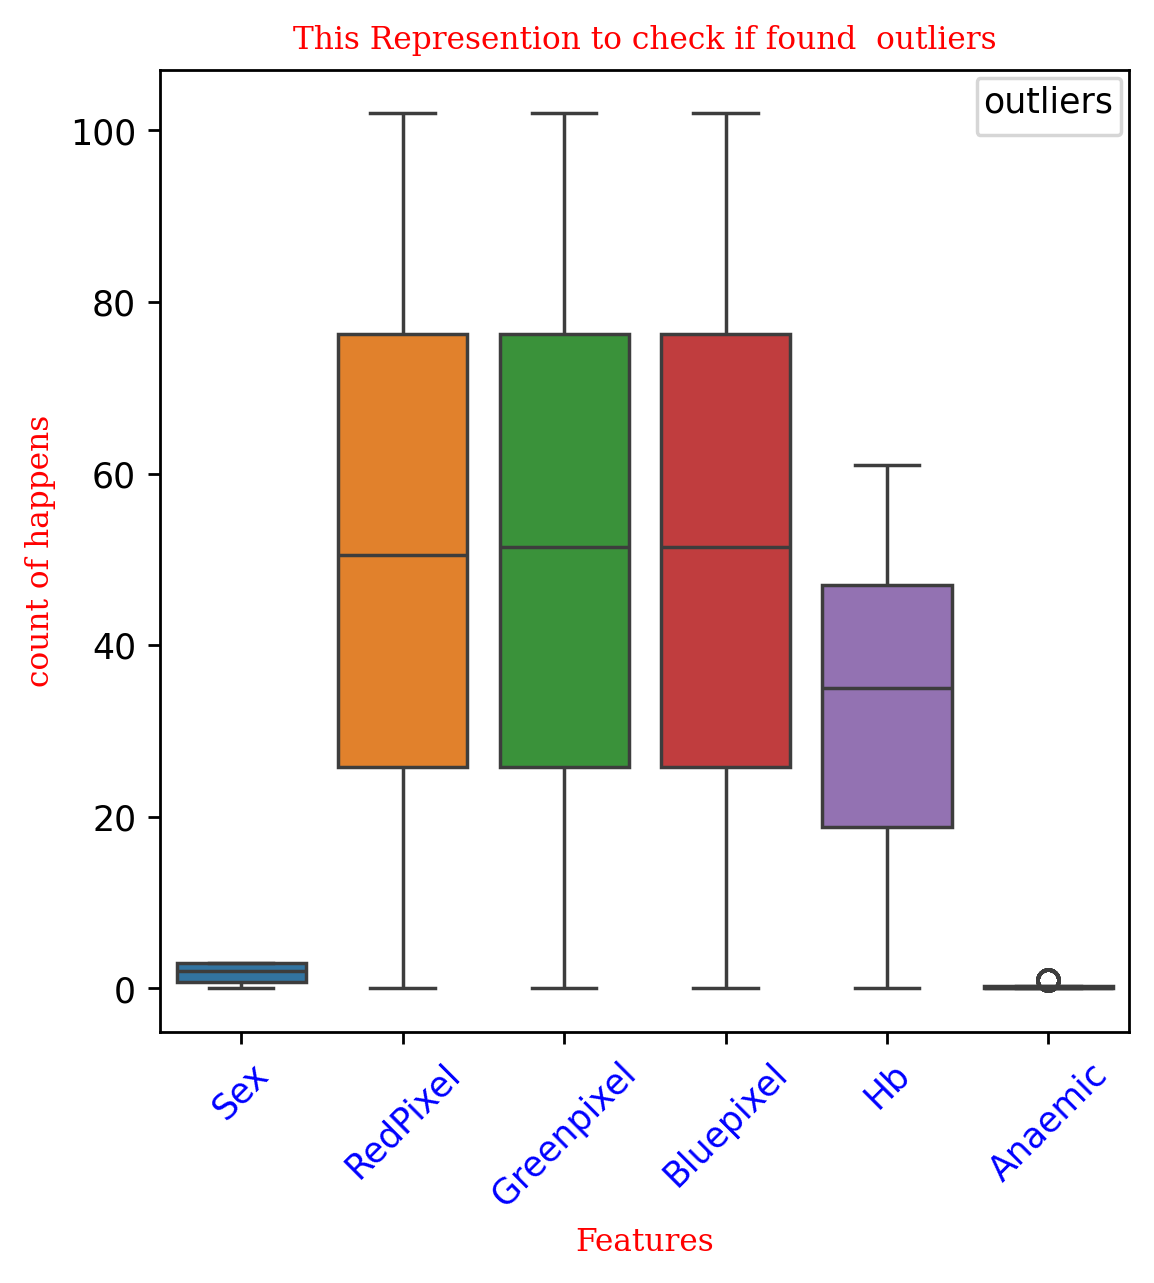

In [15]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

In [16]:
# Check if there are aduplicated values in the data and remove it if found any  :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [17]:
data.drop(duplicated_features)

,Sex,RedPixel,Greenpixel,Bluepixel,Hb,Anaemic
1,0,56,33,58,44,0
2,1,43,52,54,27,0
3,0,38,55,64,44,0
4,3,18,89,53,33,0
5,2,47,27,84,60,0
...,...,...,...,...,...,...
99,1,94,62,6,50,1
100,3,7,88,88,2,1
101,0,57,99,10,36,0
102,3,48,61,41,43,0


In [18]:
# After all of this process the data become Cleaning and ready to training :
#split the data:

x=data.drop(columns="Anaemic",axis=1)
y=data["Anaemic"]
print(np.shape(x),np.shape(y))
print(len(x),len(y))


(104, 5) (104,)
104 104


In [19]:
#train the dataset:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(x_test))

(72, 5) (32, 5)
(72,) (32, 5)


## Make some Visualization to cover the Dataset:

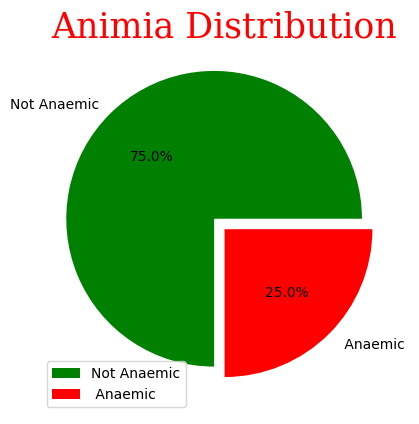

In [20]:
# to observe how many have the Animia:
f={"family":"serif","size":25,"color":"r"}
plt.title("Animia Distribution",fontdict=f)
explicit=data["Anaemic"].value_counts()
plt.pie(x=explicit,labels=["Not Anaemic"," Anaemic"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()


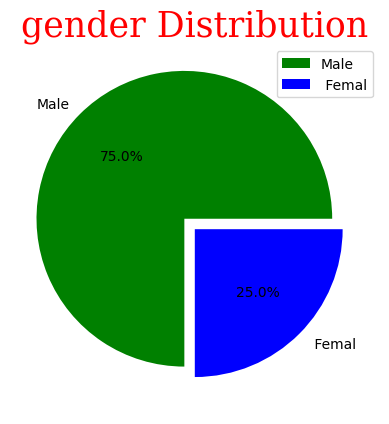

In [21]:
# to observe how many of the gender ::
f={"family":"serif","size":25,"color":"r"}
plt.title("gender Distribution",fontdict=f)
explicit=data["Anaemic"].value_counts()
plt.pie(x=explicit,labels=["Male"," Femal"],colors=["g","b"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()

/tmp/ipykernel_29679/4252899947.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_Anaemic.index,y=top_10_Anaemic.values,color="r",palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


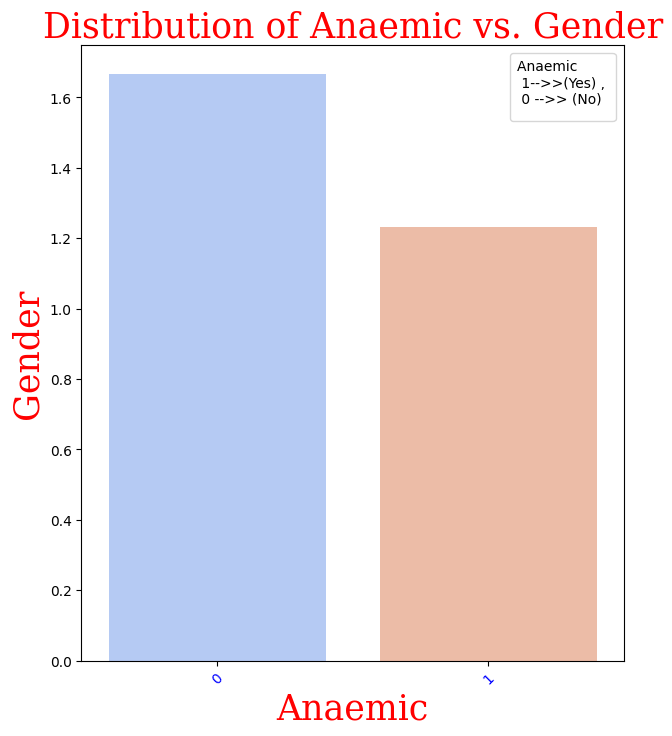

In [22]:
# to observe how many of persons that have animai:
# oserve the Anaemic vs. Sex:

plt.figure(figsize=(7,8))
plt.title("Distribution of Anaemic vs. Gender",fontdict=f)
top_10_Anaemic=data.groupby("Anaemic")["Sex"].mean().sort_values(ascending=False)
sns.barplot(x=top_10_Anaemic.index,y=top_10_Anaemic.values,color="r",palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("Anaemic",fontdict=f)
plt.ylabel("Gender",fontdict=f)
plt.legend(title="Anaemic \n 1-->>(Yes) , \n 0 -->> (No)",prop={'size': 12})
plt.show()


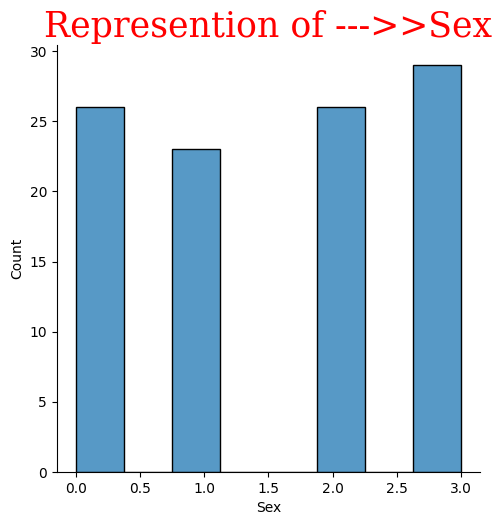

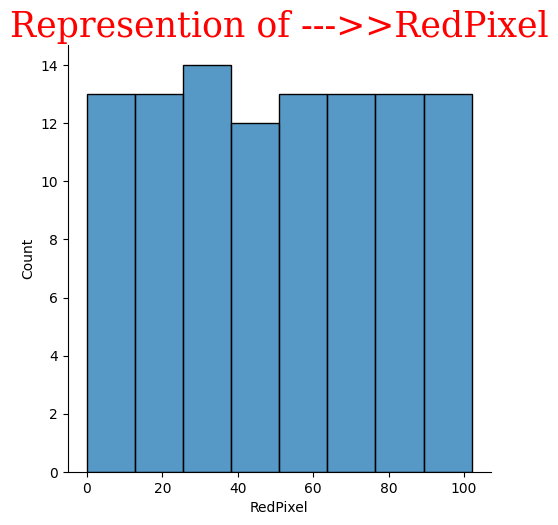

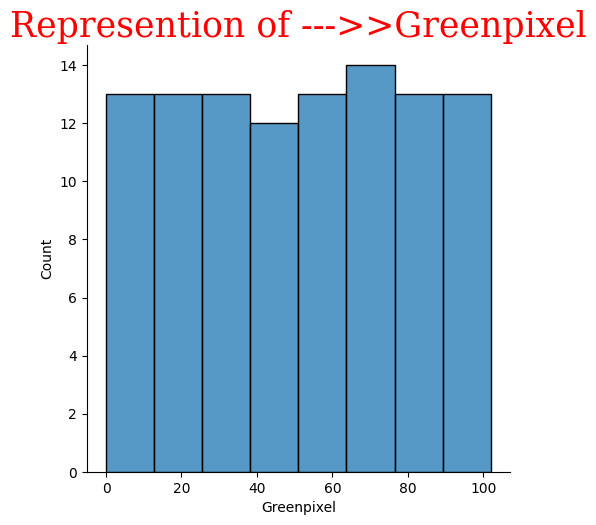

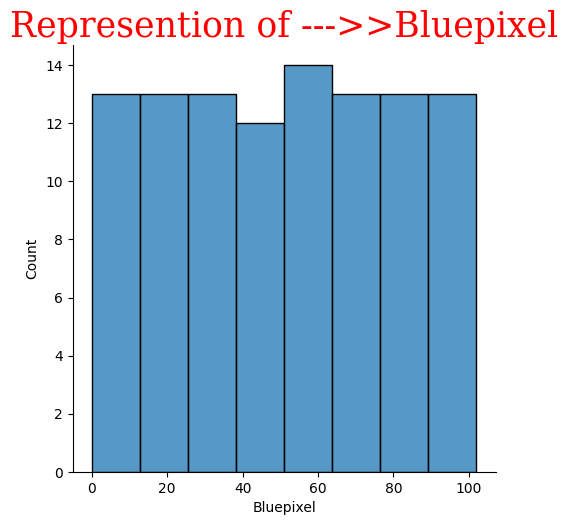

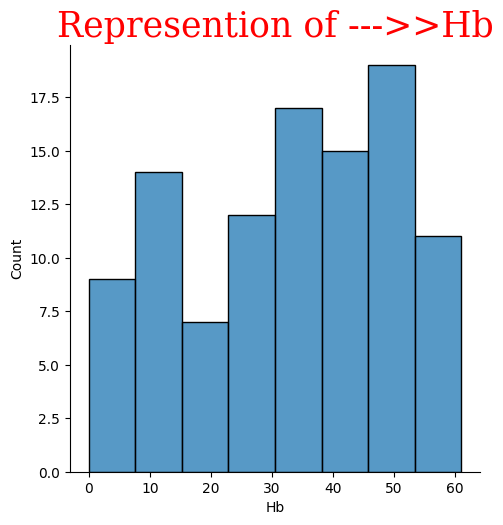

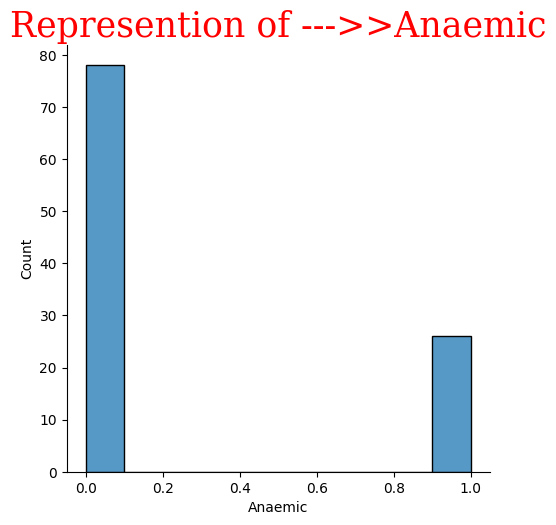

In [23]:
# Represention of the ALL Features:
for col in data.select_dtypes(include="int64").columns:
    sns.displot(data[col])
    plt.title("Represention of --->>"+col,fontdict=f)

<Figure size 7500x4500 with 0 Axes>

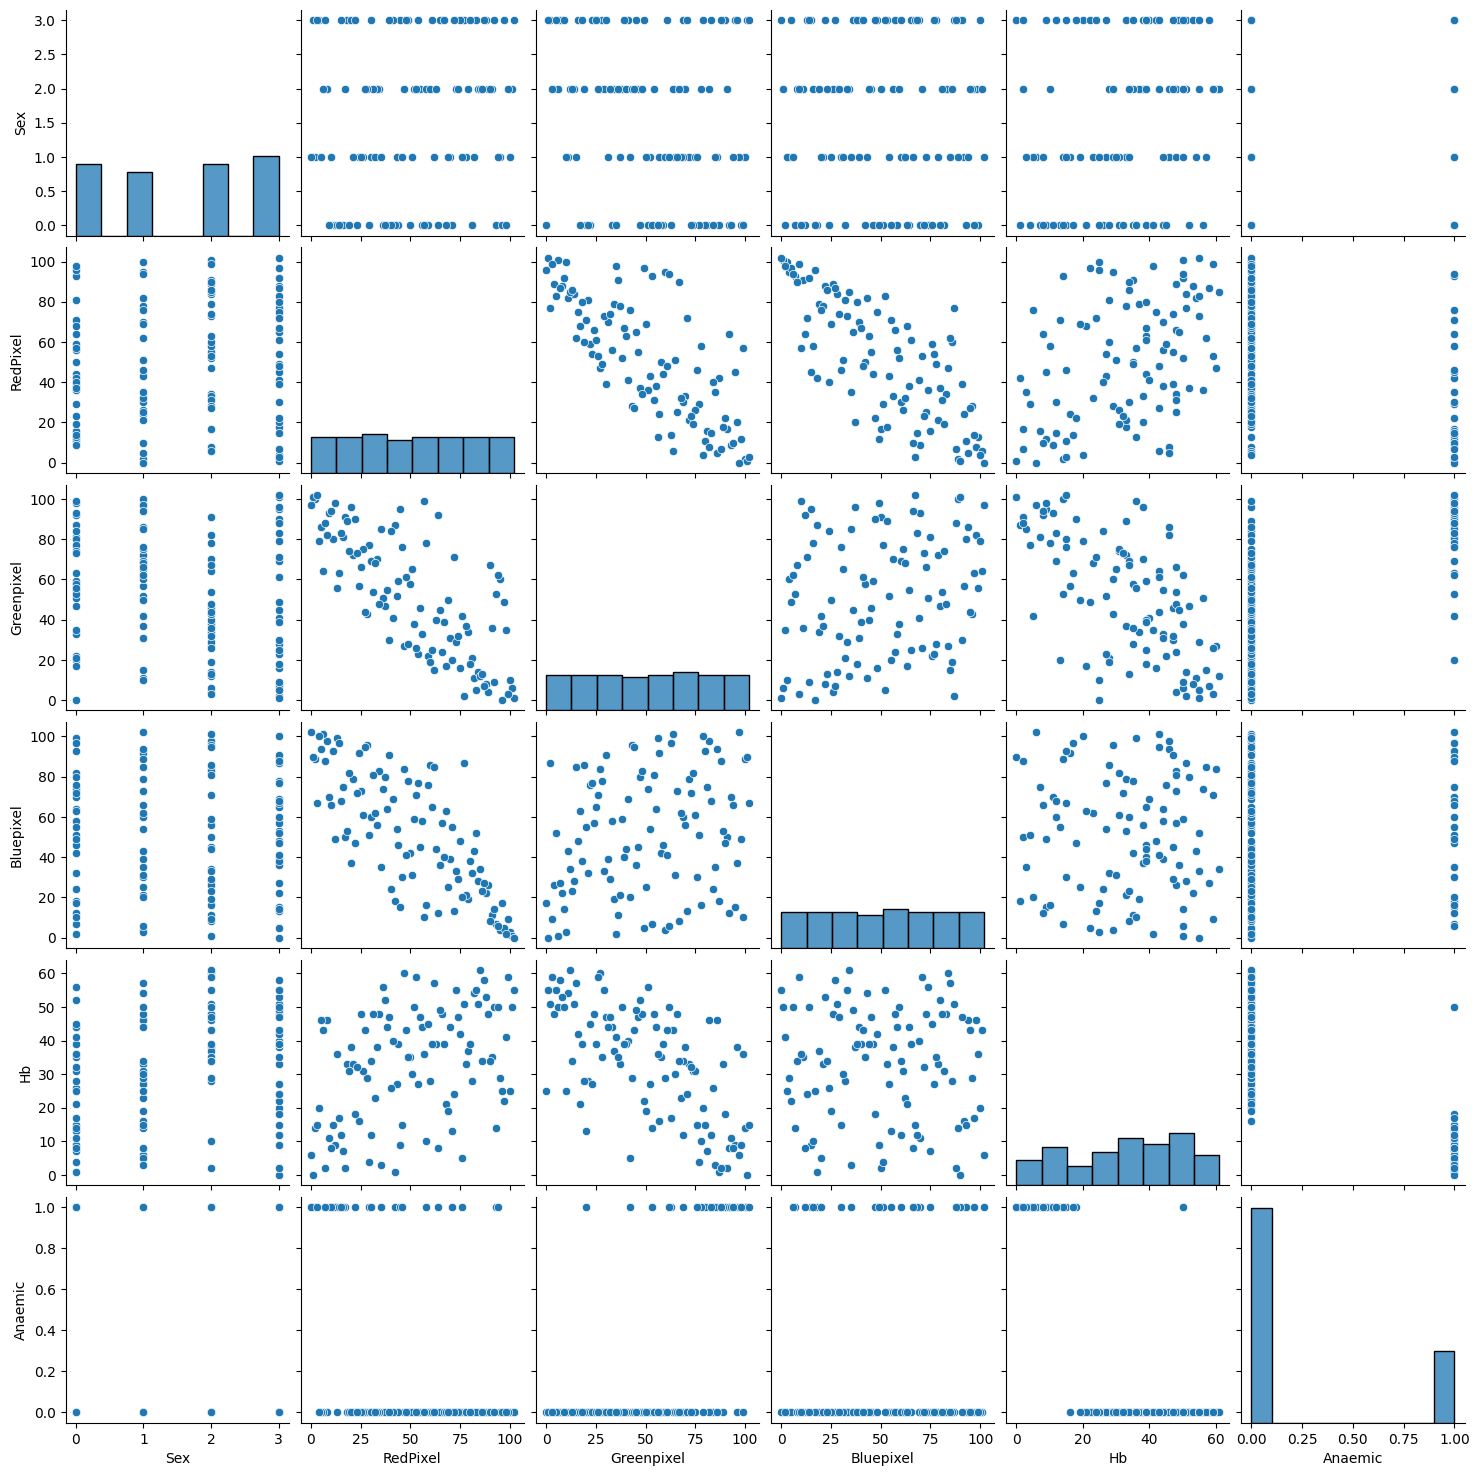

In [24]:
# scatterplots & barplot to cover on the discrete_features: 
plt.figure(figsize=(25,15),dpi=300)
sns.pairplot(data.select_dtypes(include="int64"))

                 Sex  RedPixel  Greenpixel  Bluepixel        Hb   Anaemic
Sex         1.000000  0.118287   -0.195429  -0.021336  0.230171 -0.165267
RedPixel    0.118287  1.000000   -0.761192  -0.766739  0.422188 -0.373406
Greenpixel -0.195429 -0.761192    1.000000   0.233631 -0.644724  0.574230
Bluepixel  -0.021336 -0.766739    0.233631   1.000000 -0.041577  0.035820
Hb          0.230171  0.422188   -0.644724  -0.041577  1.000000 -0.764309
Anaemic    -0.165267 -0.373406    0.574230   0.035820 -0.764309  1.000000
---------------------------------------------------------------------------


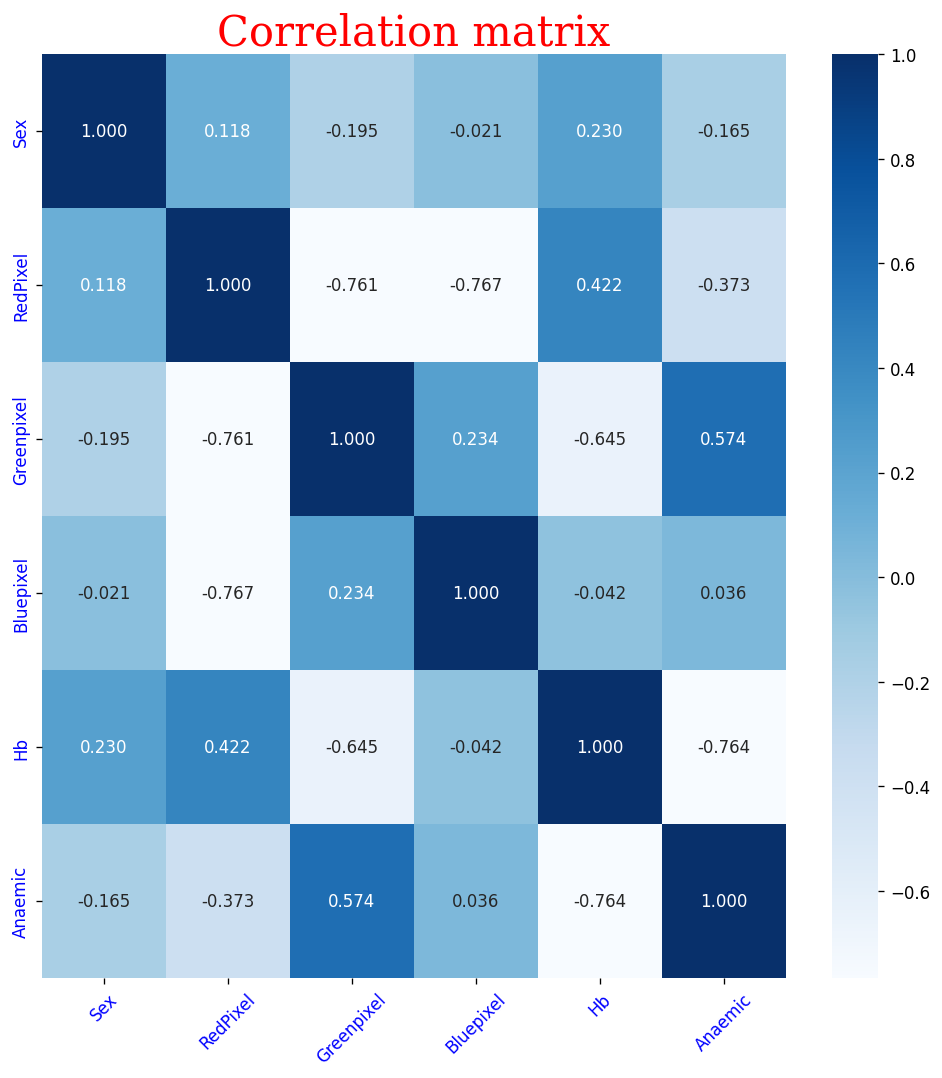

In [25]:
# Calculate correlation with the configusion_matrix or Correlation Matrix :

correlation=data.select_dtypes("number").corr()
print(correlation)
print("-"*75)
plt.figure(figsize=(10,10),dpi=120)
plt.title("Correlation matrix",fontdict=f)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=90,color="b")
sns.heatmap(correlation,annot=True,fmt="0.03f",cmap='Blues')
plt.show()

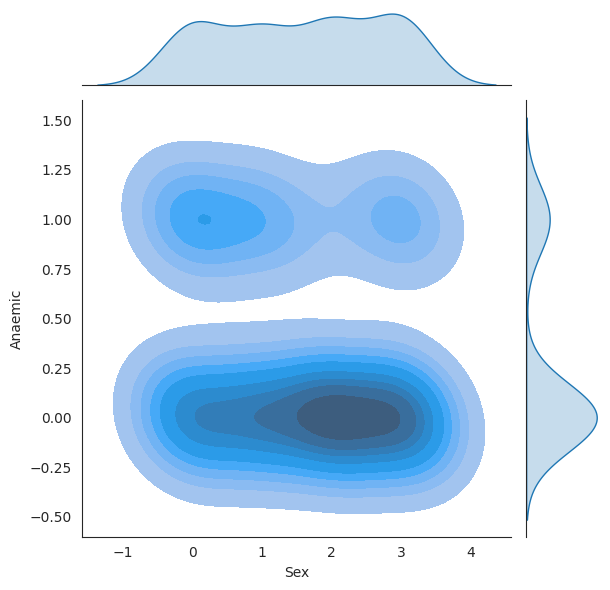

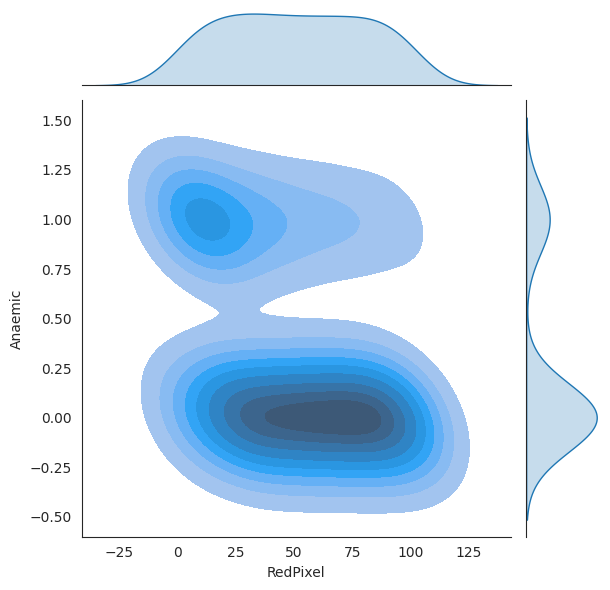

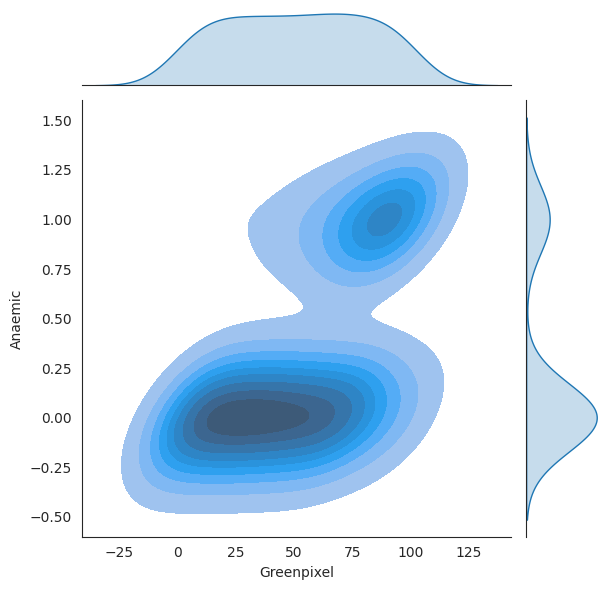

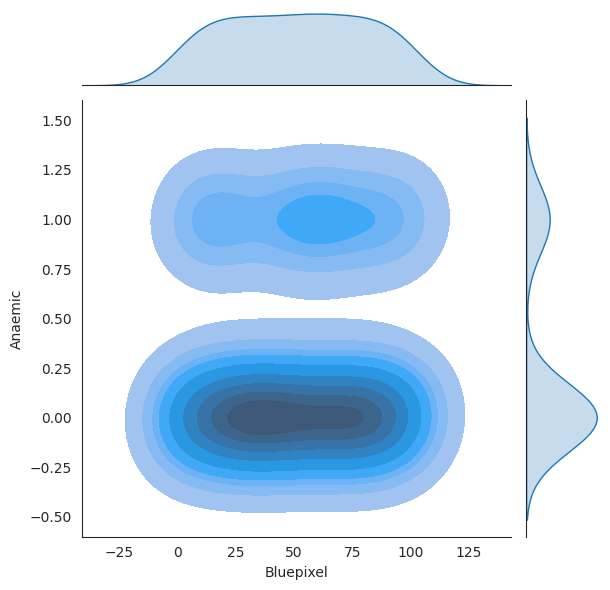

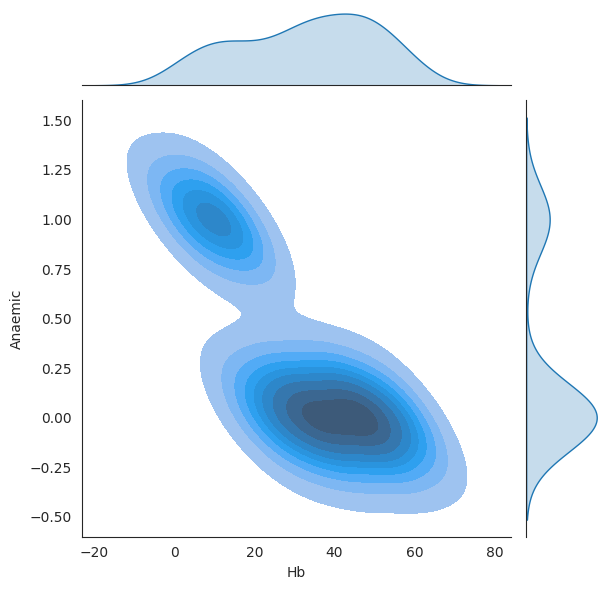

In [26]:
# observe the contor of Anaemic with the other features 
for col in data.select_dtypes("number"):
    if col !="Anaemic":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Anaemic"],kind="kde",fill=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


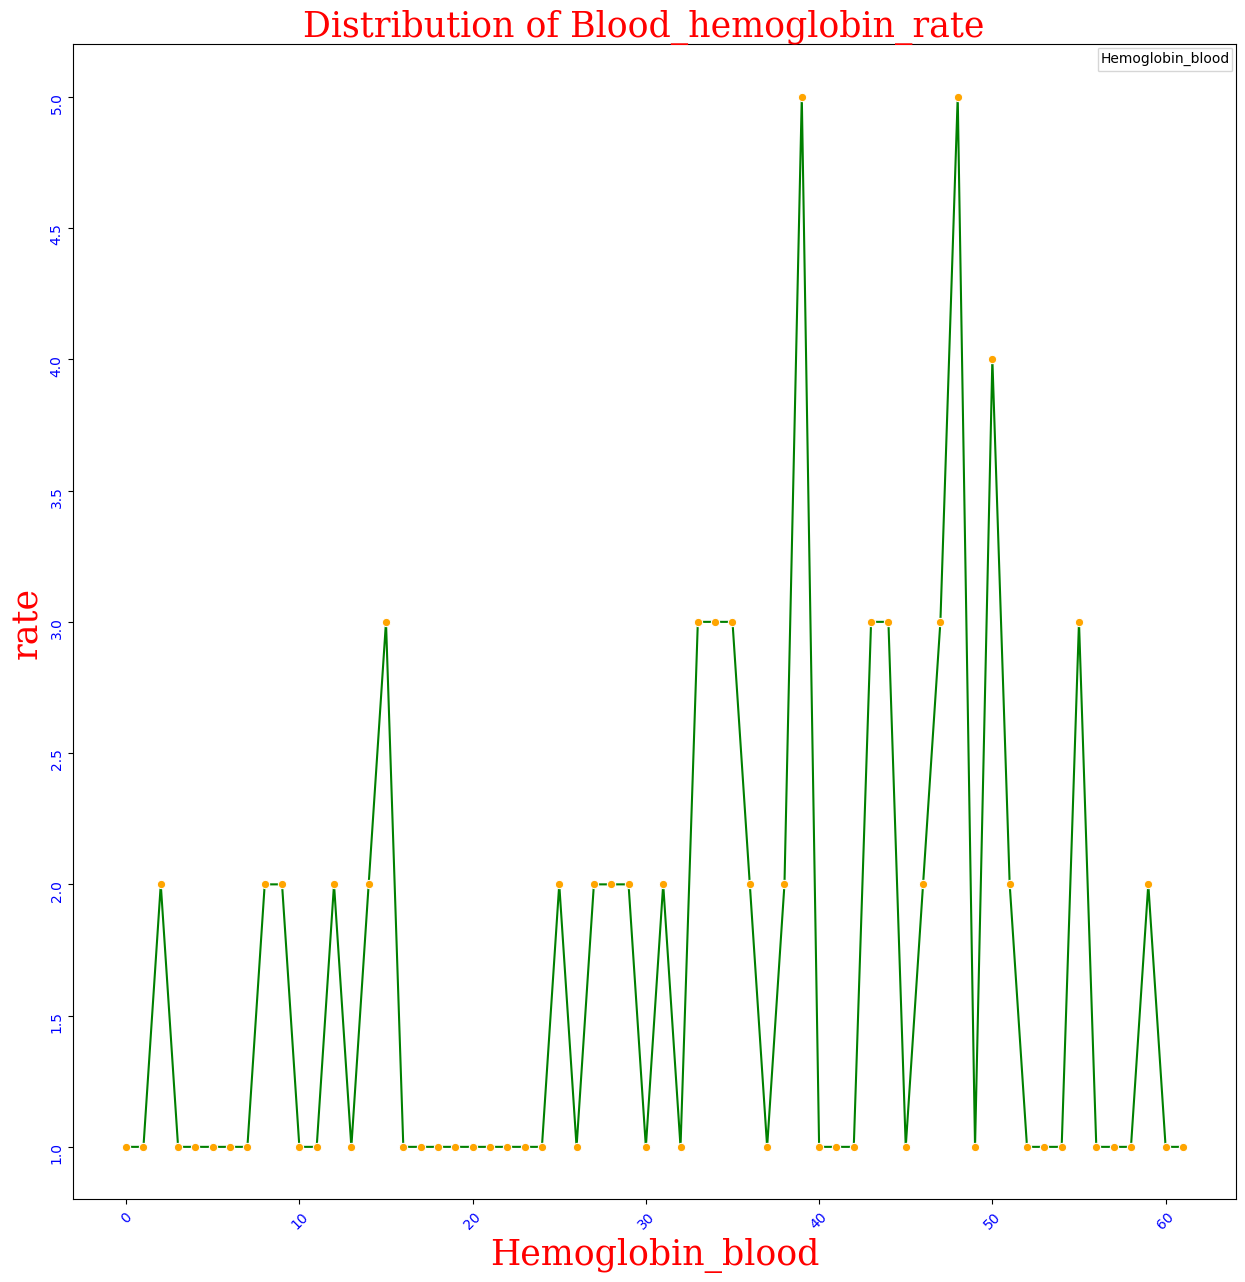

In [27]:
# distribution of Hb :

plt.figure(figsize=(15,15))
plt.title("Distribution of Blood_hemoglobin_rate  ",fontdict=f)
helgibin=data["Hb"].value_counts()
sns.lineplot(x=helgibin.index,y=helgibin.values,color="g",marker="o",mfc="orange")
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=90,color="b")
plt.xlabel("Hemoglobin_blood",fontdict=f)
plt.ylabel("rate",fontdict=f)
plt.legend(title="Hemoglobin_blood",prop={"size":5})
plt.show()

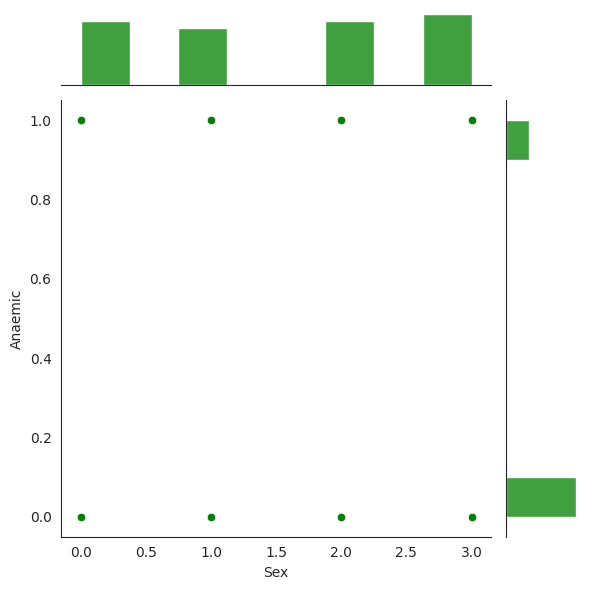

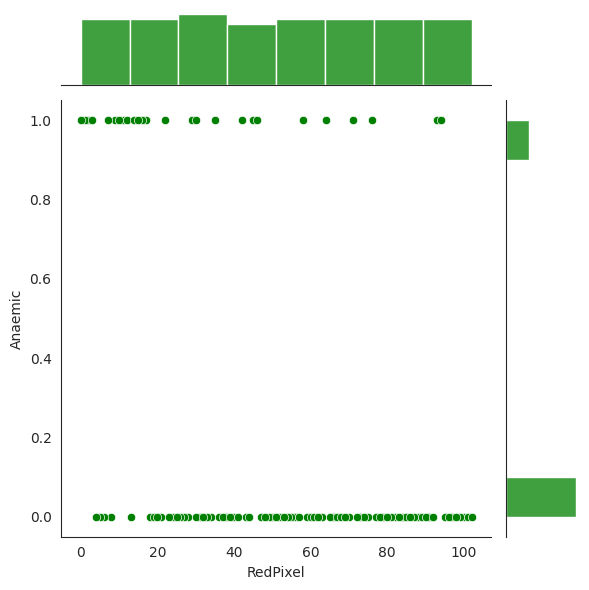

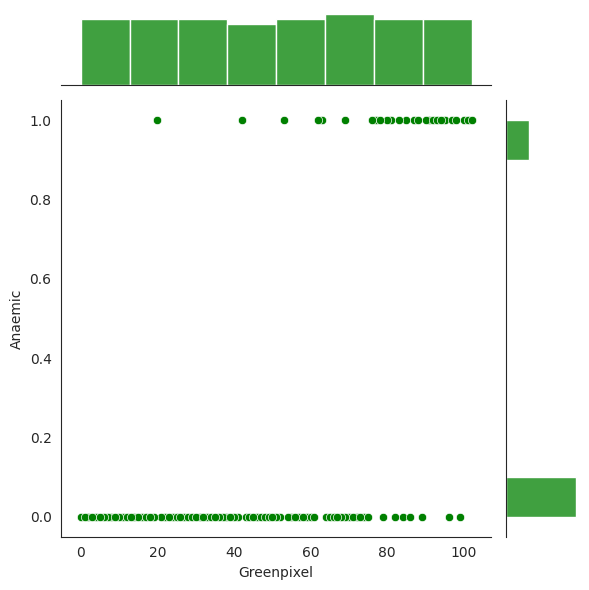

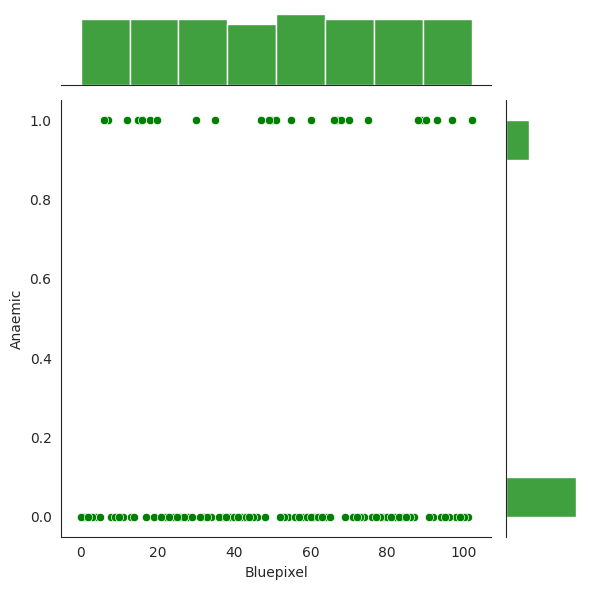

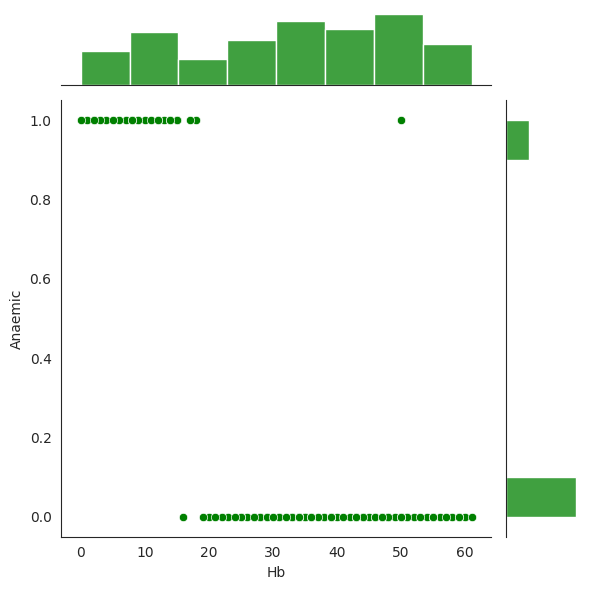

In [28]:
# Create a scatter plot :
for col in data.select_dtypes("number"):
    if col !="Anaemic":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Anaemic"],kind="scatter",color="g")

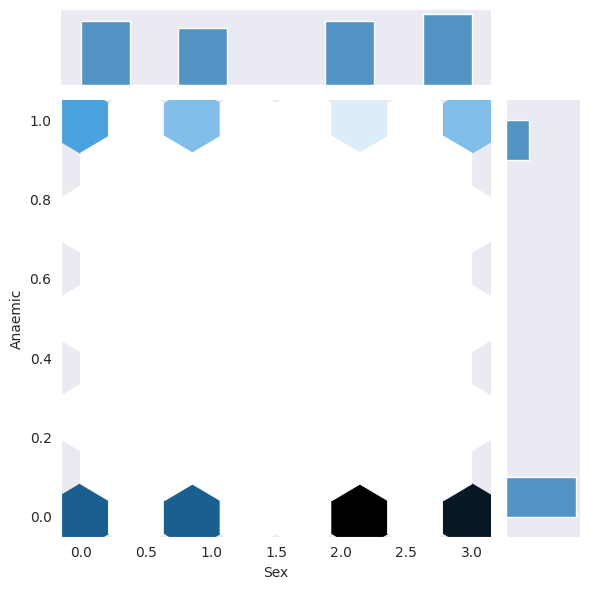

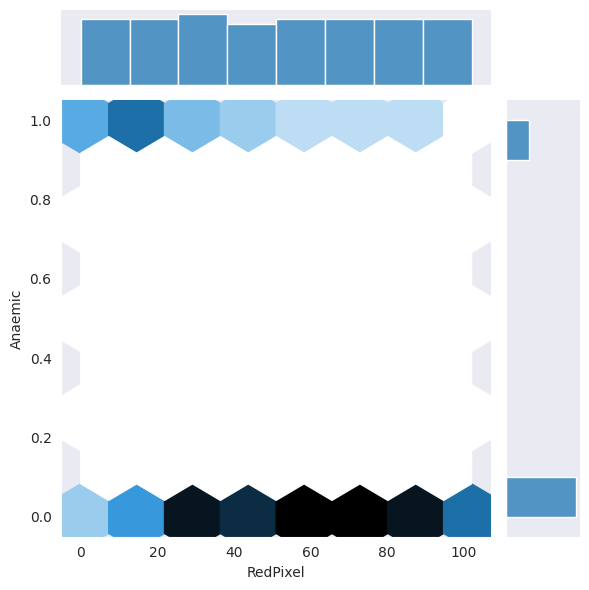

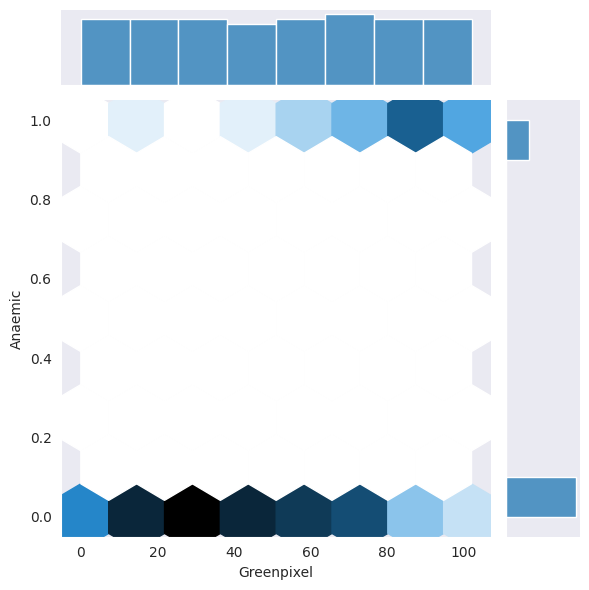

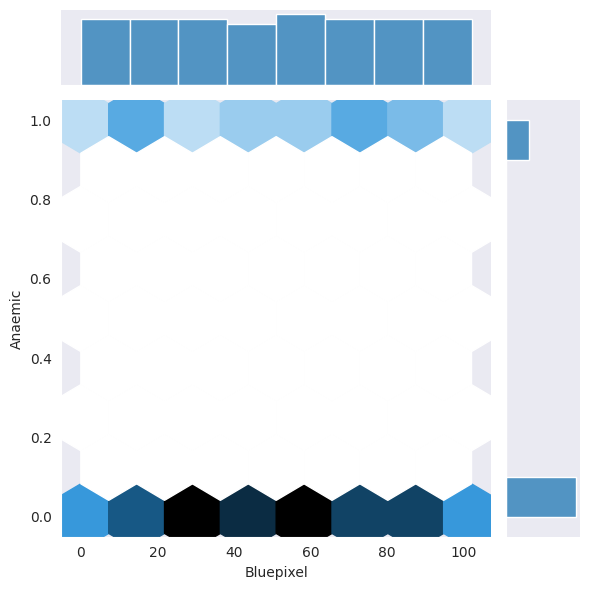

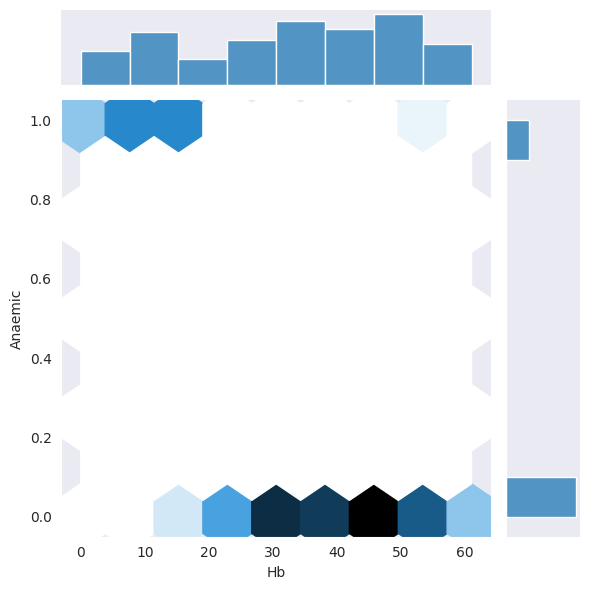

In [29]:
for col in data.select_dtypes(include="int64"):
    if col !="Anaemic":
      with sns.axes_style("dark"):
          sns.jointplot(x=data[col],y=data["Anaemic"],kind="hex")

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RedPixel'}>],
       [<Axes: title={'center': 'Greenpixel'}>,
        <Axes: title={'center': 'Bluepixel'}>],
       [<Axes: title={'center': 'Hb'}>,
        <Axes: title={'center': 'Anaemic'}>]], dtype=object)

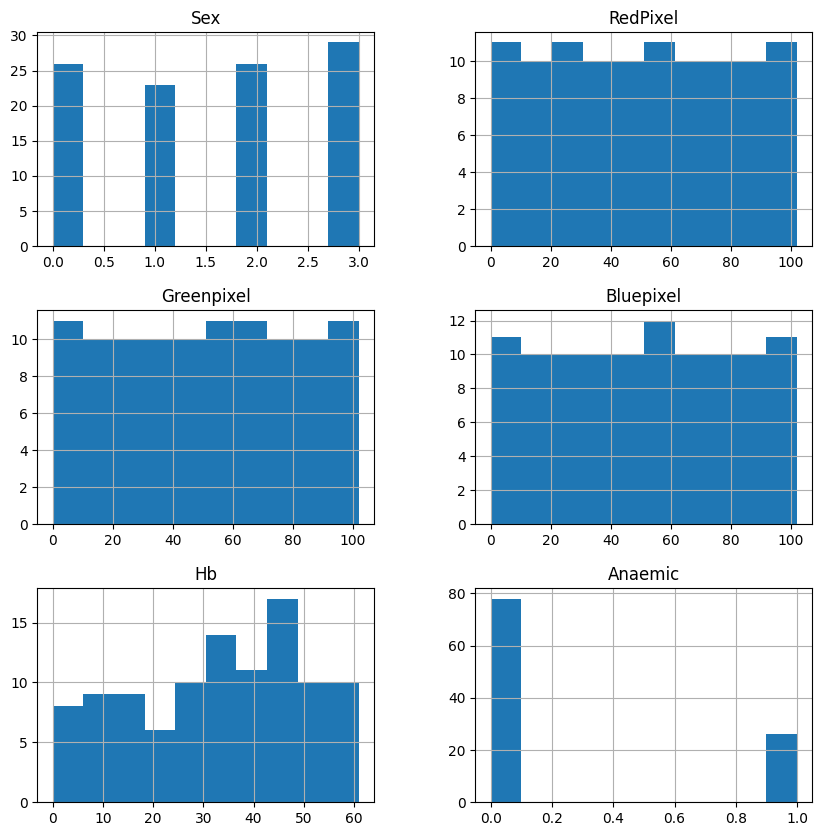

In [30]:
data.hist(figsize=(10,10))

## Some Another Data Explantory : 

In [31]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [32]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5])

In [33]:
num_cols=data.select_dtypes("number").columns
num_cols[selector.get_support(indices=True)]

Index(['Sex', 'RedPixel', 'Greenpixel', 'Bluepixel', 'Hb', 'Anaemic'], dtype='object')

In [34]:
# To  detect the high and low-low cardonality features and how to remove it

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [35]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)


,Sex,RedPixel,Greenpixel,Bluepixel,Hb,Anaemic
0,2,17,91,50,2,1
1,0,56,33,58,44,0
2,1,43,52,54,27,0
3,0,38,55,64,44,0
4,3,18,89,53,33,0
...,...,...,...,...,...,...
99,1,94,62,6,50,1
100,3,7,88,88,2,1
101,0,57,99,10,36,0
102,3,48,61,41,43,0


In [36]:
# calcualte the Correlation with differt methods :

corr1=data.select_dtypes("number").corr(method="spearman")
print("spearman_correlation --->> \n",corr1)

print("-"*50)

corr2=data.select_dtypes("number").corr(method="pearson")
print("pearson_correlation --->> \n",corr2)

print("-"*50)

corr3=data.select_dtypes("number").corr(method="kendall")
print("kendall_correlation -->> \n" ,corr3)

spearman_correlation --->> 
                  Sex  RedPixel  Greenpixel  Bluepixel        Hb   Anaemic
Sex         1.000000  0.114882   -0.190144  -0.021241  0.234477 -0.159762
RedPixel    0.114882  1.000000   -0.761697  -0.765954  0.416622 -0.374648
Greenpixel -0.190144 -0.761697    1.000000   0.233390 -0.642041  0.575842
Bluepixel  -0.021241 -0.765954    0.233390   1.000000 -0.037332  0.035875
Hb          0.234477  0.416622   -0.642041  -0.037332  1.000000 -0.703247
Anaemic    -0.159762 -0.374648    0.575842   0.035875 -0.703247  1.000000
--------------------------------------------------
pearson_correlation --->> 
                  Sex  RedPixel  Greenpixel  Bluepixel        Hb   Anaemic
Sex         1.000000  0.118287   -0.195429  -0.021336  0.230171 -0.165267
RedPixel    0.118287  1.000000   -0.761192  -0.766739  0.422188 -0.373406
Greenpixel -0.195429 -0.761192    1.000000   0.233631 -0.644724  0.574230
Bluepixel  -0.021336 -0.766739    0.233631   1.000000 -0.041577  0.035820
Hb  

In [37]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Anaemic").select_dtypes("number").fillna(0),data["Anaemic"])

SelectKBest(k=5)

In [38]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Anaemic").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,9.362524e-02,2.864166,Sex
1,9.454294e-05,16.526413,RedPixel
2,1.852521e-10,50.179878,Greenpixel
3,7.181069e-01,0.131038,Bluepixel
4,3.760074e-21,143.291358,Hb


In [39]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Anaemic").select_dtypes("number").fillna(0),data["Anaemic"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Anaemic").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=False)

Hb            0.486067
Greenpixel    0.193076
RedPixel      0.091617
Bluepixel     0.075438
Sex           0.003250
dtype: float64

## part 2: Bulding the Models

In [40]:
# 1- RandomForestClassifier :
RC1=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
RC1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [41]:
RC1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [42]:
#predict the model:

y_predict=RC1.predict(x_test)
y_predict[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [43]:
# compute the accuracy:
print(f"accuracy ---->>> {RC1.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 93.75%


In [44]:
#improve from accuracy:
np.random.seed()
for i in range(10,110,10):
    print(f"at n_estimators= {i} n_estimators")
    RC2=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy={RC2.score(x_test,y_test)*100:0.2f}%")

at n_estimators= 10 n_estimators
accuracy=93.75%
at n_estimators= 20 n_estimators
accuracy=93.75%
at n_estimators= 30 n_estimators
accuracy=96.88%
at n_estimators= 40 n_estimators
accuracy=93.75%
at n_estimators= 50 n_estimators
accuracy=93.75%
at n_estimators= 60 n_estimators
accuracy=93.75%
at n_estimators= 70 n_estimators
accuracy=93.75%
at n_estimators= 80 n_estimators
accuracy=93.75%
at n_estimators= 90 n_estimators
accuracy=93.75%
at n_estimators= 100 n_estimators
accuracy=93.75%


In [45]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_predict)*100:0.2f}%")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_predict)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test,y_predict)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test,y_predict)
print("Confision Matrix --->> \n ",conf_matrix)



accuracy:93.75%
**************************************************
True positve prediction : 6
True Negative predicion : 24
False positve prediction: 2
False Negative prediction: 0
**************************************************
 precsion_score :100.00%
recall_score:75.00%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.75      0.86         8

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32

Confision Matrix --->> 
  [[24  0]
 [ 2  6]]


In [46]:
# 2- DecisionTree Model:
DT=tree.DecisionTreeClassifier(random_state=42,max_depth=5)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [48]:
y_predic=DT.predict(x_test)
y_predic[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [49]:
# compute the accuracy:
print(f"accuracy ---->>> {DT.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 90.62%


In [50]:
# explain the prediction:
tree_representation = tree.export_text(DT,feature_names=list(x.columns))
print(tree_representation)

|--- Hb <= 19.00
|   |--- Bluepixel <= 91.00
|   |   |--- class: 1
|   |--- Bluepixel >  91.00
|   |   |--- Greenpixel <= 68.50
|   |   |   |--- class: 0
|   |   |--- Greenpixel >  68.50
|   |   |   |--- class: 1
|--- Hb >  19.00
|   |--- class: 0



In [51]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_predic)*100:0.2f}%")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_predic)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_predic)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test,y_predic)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test,y_predic)
print("Confision Matrix --->> \n ",conf_matrix)


accuracy:90.62%
**************************************************
True positve prediction : 6
True Negative predicion : 23
False positve prediction: 2
False Negative prediction: 1
**************************************************
 precsion_score :85.71%
recall_score:75.00%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32

Confision Matrix --->> 
  [[23  1]
 [ 2  6]]


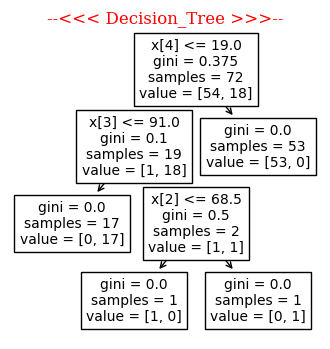

In [52]:
#plot the tree :

# if i want to plot tree:

f={"color":"r","family":"serif","size":12}
plt.figure(figsize=(4,4),dpi=100) 
tree.plot_tree(DT)
plt.title("--<<< Decision_Tree >>>--",fontdict=f)
plt.show()

In [53]:
# 3- svm Model :
SV=svm.SVC(random_state=42,kernel="linear" )
SV.fit(x_train,y_train)


SVC(kernel='linear', random_state=42)

In [54]:
y_pred=SV.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [55]:
#Evalute the model:
print("Sqare Error --->>",metrics.mean_squared_error(y_test,y_pred))
print("accuracy --->>>",SV.score(x_test,y_test)*100)

Sqare Error --->> 0.09375
accuracy --->>> 90.625


In [56]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_pred)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test, y_pred)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test, y_pred)
print("Confision Matrix --->> \n ",conf_matrix)

accuracy:90.62%
**************************************************
True positve prediction : 6
True Negative predicion : 23
False positve prediction: 2
False Negative prediction: 1
**************************************************
 precsion_score :85.71%
recall_score:75.00%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32

Confision Matrix --->> 
  [[23  1]
 [ 2  6]]


In [57]:
# 4-create model of LogisticRegression  --->> Classification

lg=LogisticRegression(random_state=42,multi_class='auto',n_jobs=-1)
lg.fit(x_train,y_train)


LogisticRegression(n_jobs=-1, random_state=42)

In [58]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
y_pr=lg.predict(x_test)
y_pr[:15]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [60]:
#Evalute the model:
print("Mean Square Error--->>",metrics.mean_squared_error(y_test,y_pr)*100)
print("accuracy --->>>",lg.score(x_test,y_test)*100)

Mean Square Error--->> 9.375
accuracy --->>> 90.625


In [61]:

#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pr)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_pr)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test, y_pr)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test, y_pr)
print("Confision Matrix --->> \n ",conf_matrix)

accuracy:90.62%
**************************************************
True positve prediction : 6
True Negative predicion : 23
False positve prediction: 2
False Negative prediction: 1
**************************************************
 precsion_score :85.71%
recall_score:75.00%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32

Confision Matrix --->> 
  [[23  1]
 [ 2  6]]


In [62]:
# 5- Create the Naive Bayes Classifier
NV = GaussianNB()

# Train the model
NV.fit(x_train, y_train)


# Make predictions

y_pre = NV.predict(x_test)
print("prediction --->>  \n",y_pr[:10])
print("-"*50)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pre)
report = classification_report(y_test, y_pre)
print("Mean Square Error--->>",metrics.mean_squared_error(y_test,y_pre)*100)

print("-"*50)
# confision_Matrix :

conf_matrix=confusion_matrix(y_test, y_pre)


# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pre)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("-"*50)

print(f"Accuracy: {accuracy*100:0.2f}%")
print("-"*50)
print("Classification Report:")
print(report)
print("-"*50)
print("Confision_MAtrix")
print(conf_matrix)

prediction --->>  
 [0 0 0 1 0 0 0 0 0 0]
--------------------------------------------------
Mean Square Error--->> 3.125
--------------------------------------------------
True positve prediction : 7
True Negative predicion : 24
False positve prediction: 1
False Negative prediction: 0
--------------------------------------------------
Accuracy: 96.88%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.88      0.93         8

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32

--------------------------------------------------
Confision_MAtrix
[[24  0]
 [ 1  7]]


 ## Bulding a Neural Network model By using Tensorflow

In [63]:
# imports :
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

2024-07-06 18:34:05.339702: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-06 18:34:05.341257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 18:34:05.369997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 18:34:05.370737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 18:34:05.857911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [64]:
#Build the model:

model=Sequential([
    
    Input(shape=[5]),
    
    Dense(units=128,activation="relu"),
    Dropout(0.1),
    
    Dense(units=256,activation="relu"),
    Dropout(0.2),

    Dense(units=512,activation="relu"),
    Dropout(0.3),

    Dense(units=256,activation="relu"),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid"),
        
               ])
model

2024-07-06 18:34:06.320356: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-06 18:34:06.320890: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [65]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=BinaryCrossentropy(from_logits=True),  # Use from_logits=True for logits output
    metrics=['accuracy']
)

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [67]:
# Fit the model
model.fit(x_train, y_train, epochs=20, batch_size=35, validation_split=0.1)


Epoch 1/20


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 115ms/step - loss: 3.4548 - accuracy: 0.5312 - val_loss: 2.7723 - val_accuracy: 0.8750
Epoch 2/20
2/2 [==============================] - 0s 18ms/step - loss: 4.1178 - accuracy: 0.7344 - val_loss: 2.1041 - val_accuracy: 0.8750
Epoch 3/20
2/2 [==============================] - 0s 20ms/step - loss: 1.8127 - accuracy: 0.7188 - val_loss: 0.9760 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 0s 19ms/step - loss: 0.8044 - accuracy: 0.7656 - val_loss: 0.9427 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 1.5634 - accuracy: 0.6719 - val_loss: 0.7049 - val_accuracy: 0.7500
Epoch 6/20
2/2 [==============================] - 0s 17ms/step - loss: 0.3491 - accuracy: 0.8594 - val_loss: 0.7132 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 0.7355 - accuracy: 0.7969 - val_loss: 0.7367 - val_accuracy: 0.8750
Epoch 8/20
2/2 [=====================

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 9/20
2/2 [==============================] - 0s 18ms/step - loss: 0.4752 - accuracy: 0.8438 - val_loss: 0.3802 - val_accuracy: 0.8750
Epoch 10/20
2/2 [==============================] - 0s 18ms/step - loss: 0.3944 - accuracy: 0.8594 - val_loss: 0.1959 - val_accuracy: 0.8750
Epoch 11/20
2/2 [==============================] - 0s 20ms/step - loss: 0.3121 - accuracy: 0.8906 - val_loss: 0.1798 - val_accuracy: 1.0000
Epoch 12/20
2/2 [==============================] - 0s 19ms/step - loss: 0.4475 - accuracy: 0.7969 - val_loss: 0.1528 - val_accuracy: 1.0000
Epoch 13/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2593 - accuracy: 0.9062 - val_loss: 0.1530 - val_accuracy: 0.8750
Epoch 14/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2493 - accuracy: 0.8906 - val_loss: 0.1636 - val_accuracy: 0.8750
Epoch 15/20
2/2 [==============================] - 0s 17ms/step - loss: 0.2705 - accuracy: 0.8906 - val_loss: 0.1612 - val_accuracy: 0.8750
Epoch 16/20
2/2 [====

In [68]:
# predict on the model:
y_prediction=model.predict(x_test)
y_prediction[:10]

1/1 [==============================] - 0s 59ms/step


array([[6.7207161e-03],
       [2.8629974e-04],
       [8.6839740e-05],
       [9.9912637e-01],
       [7.4936071e-04],
       [8.7846713e-03],
       [3.3610988e-05],
       [5.5990437e-05],
       [9.0252855e-05],
       [5.1994878e-04]], dtype=float32)

In [69]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_prediction)} \n the max_value for prediction --->>> {np.max(y_prediction)}")

the min_value for prediction --->> 2.030396535701584e-05 
 the max_value for prediction --->>> 0.9991263747215271


In [70]:
#Evalute the score:

model.evaluate(x_test,y_test,verbose=2)

1/1 - 0s - loss: 0.3361 - accuracy: 0.9375 - 13ms/epoch - 13ms/step


[0.3360598683357239, 0.9375]

In [71]:
# Build Regulized model: (Sequentail Api Regulized) -->> to improve from the accuracy 

model_r=Sequential([
    
    Input(shape=[5]),
    
    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    
    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid",kernel_regularizer=l2(.01)),
        
    
                  ])
model_r


In [72]:
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )

In [73]:
model_r.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1,)

Epoch 1/20


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 94ms/step - loss: 12.0017 - accuracy: 0.6250 - val_loss: 10.2048 - val_accuracy: 0.8750
Epoch 2/20
2/2 [==============================] - 0s 18ms/step - loss: 10.9620 - accuracy: 0.7500 - val_loss: 9.5025 - val_accuracy: 0.7500
Epoch 3/20
2/2 [==============================] - 0s 17ms/step - loss: 10.4111 - accuracy: 0.6406 - val_loss: 9.2558 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 0s 19ms/step - loss: 9.5918 - accuracy: 0.7344 - val_loss: 9.5903 - val_accuracy: 0.8750
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 9.1235 - accuracy: 0.7812 - val_loss: 9.3673 - val_accuracy: 0.8750
Epoch 6/20
2/2 [==============================] - 0s 17ms/step - loss: 9.0231 - accuracy: 0.7969 - val_loss: 8.6888 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 0s 18ms/step - loss: 8.4040 - accuracy: 0.8438 - val_loss: 8.2618 - val_accuracy: 0.7500
Epoch 8/20
1/2 [==============>...

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 0s 18ms/step - loss: 8.0286 - accuracy: 0.8281 - val_loss: 8.0866 - val_accuracy: 0.8750
Epoch 9/20
2/2 [==============================] - 0s 17ms/step - loss: 7.9401 - accuracy: 0.7969 - val_loss: 7.7370 - val_accuracy: 0.8750
Epoch 10/20
2/2 [==============================] - 0s 17ms/step - loss: 7.9584 - accuracy: 0.8438 - val_loss: 7.4109 - val_accuracy: 0.8750
Epoch 11/20
2/2 [==============================] - 0s 17ms/step - loss: 7.2053 - accuracy: 0.9531 - val_loss: 7.5194 - val_accuracy: 0.8750
Epoch 12/20
2/2 [==============================] - 0s 18ms/step - loss: 7.4192 - accuracy: 0.8594 - val_loss: 7.4752 - val_accuracy: 0.8750
Epoch 13/20
2/2 [==============================] - 0s 18ms/step - loss: 7.7869 - accuracy: 0.7812 - val_loss: 7.2074 - val_accuracy: 0.8750
Epoch 14/20
2/2 [==============================] - 0s 18ms/step - loss: 7.0346 - accuracy: 0.8750 - val_loss: 6.8355 - val_accuracy: 0.8750
Epoch 15/20
2/2 [================

In [74]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

1/1 [==============================] - 0s 32ms/step


array([[1.69258611e-03],
       [1.24777662e-05],
       [1.86589514e-05],
       [9.86403346e-01],
       [7.42537595e-05],
       [5.03770309e-03],
       [3.46428749e-07],
       [3.04562514e-06],
       [1.15446155e-05],
       [2.98813738e-05]], dtype=float32)

In [75]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 3.8121296341842026e-08 
 the max_value for prediction --->>> 0.9864033460617065 


In [76]:
#Evalute the score:

model_r.evaluate(x_test,y_test,verbose=2)

1/1 - 0s - loss: 6.4937 - accuracy: 0.9375 - 11ms/epoch - 11ms/step


[6.493682861328125, 0.9375]

##  some Results about the machine learning models :
      *  1- RandomForestClassifier : accuracy -->> 93.75% and after improve the model we found  at n_estimators= 30 
           accuracy --->> 96.88% and that mean that accuracy increase by 3.13%

      *  2-DecissionTreeClassifier : accuracy -->>  90.62% 

      *  3-Support Vector Machine : accuracy -->> 90.62%

      *  4-LogisticRegression : accuracy -->> 90.62% 

      *  5-Naivebayes : accuracy -->> 96.88% 

   * we cant say that the best model is   RandomForestClassifier &  Naivebayes because every model has advantages and disadvantages , but this
         2 models give us the highly accuracy .
   * That was our results from Traditional machine learning models .

   * About Neural Network models that build by using Tensorflow we found that  :  accuracy --->>  93.75 % and the same after improvement .      

In [77]:
print(""" 
       --->> Here is the End of the Code <<------
       --->> Devloper: AbdalRahman Gameel Ahmed Hebishy  

                  """)

 
       --->> Here is the End of the Code <<------
       --->> Devloper: AbdalRahman Gameel Ahmed Hebishy  

                  
